In [1]:
import pandas as pd
import os

os.environ["OMP_NUM_THREADS"] = "1"

DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### A Importância do Pré-processamento
O pré-processamento é uma etapa fundamental na análise de dados e construção de modelos de machine learning. Ele garante que os dados estejam em um formato adequado para serem utilizados pelos algoritmos, melhorando a qualidade e a precisão dos modelos. As principais razões para realizar o pré-processamento incluem:

- **Tratar valores ausentes**: Preenchimento ou remoção de valores nulos.
- **Normalização**: Garantir que os dados estejam em uma escala comum.
- **Codificação de variáveis categóricas**: Converter categorias em um formato numérico que pode ser interpretado pelos algoritmos.
- **Redução de dimensionalidade**: Simplificar o conjunto de dados para reduzir o tempo de processamento e melhorar a eficiência.

### O que é um Pipeline?
Um **pipeline** é uma ferramenta que permite agrupar várias etapas de pré-processamento e modelagem em uma única sequência. Isso facilita a automação e a reprodutibilidade do processo de análise de dados. Utilizar um pipeline traz diversos benefícios:

- **Organização**: Mantém o código organizado e fácil de entender.
- **Reprodutibilidade**: Garante que as mesmas transformações sejam aplicadas a novos dados de forma consistente.
- **Facilidade de Experimentação**: Permite testar diferentes combinações de transformações e modelos de maneira eficiente.

# Definindo o pré-processamento

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age","Annual Income (k$)","Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

preprocessing.fit_transform(df)

df_scaled = pd.DataFrame (
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out(),
)

df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [4]:
preprocessing.feature_names_in_


array(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype=object)

In [5]:
preprocessing


ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['Age', 'Annual Income (k$)',
                                  'Spending Score (1-100)']),
                                ('onehot', OneHotEncoder(), ['Gender'])])

In [46]:
preprocessing.get_feature_names_out()


array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [6]:
df_scaled.to_csv("../dados/Mall_Customers_no_CustomerID_scaled.csv", index=False)

## Elbow Method e Silhouette Method

### Elbow Method
O **Elbow Method** ajuda a determinar o número ideal de clusters em uma análise de agrupamento. Plotamos a soma das diferenças quadradas dentro dos clusters (WCSS) para diferentes valores de `k`. O ponto onde a diminuição da WCSS começa a desacelerar forma um "cotovelo" no gráfico, indicando o número ideal de clusters.

### Silhouette Method
O **Silhouette Method** avalia a qualidade do agrupamento calculando quão próximos os pontos estão aos seus próprios clusters em comparação com outros clusters. A pontuação varia de -1 a 1, onde valores próximos de 1 indicam um bom agrupamento. O método permite identificar o número de clusters que maximiza a qualidade do agrupamento.

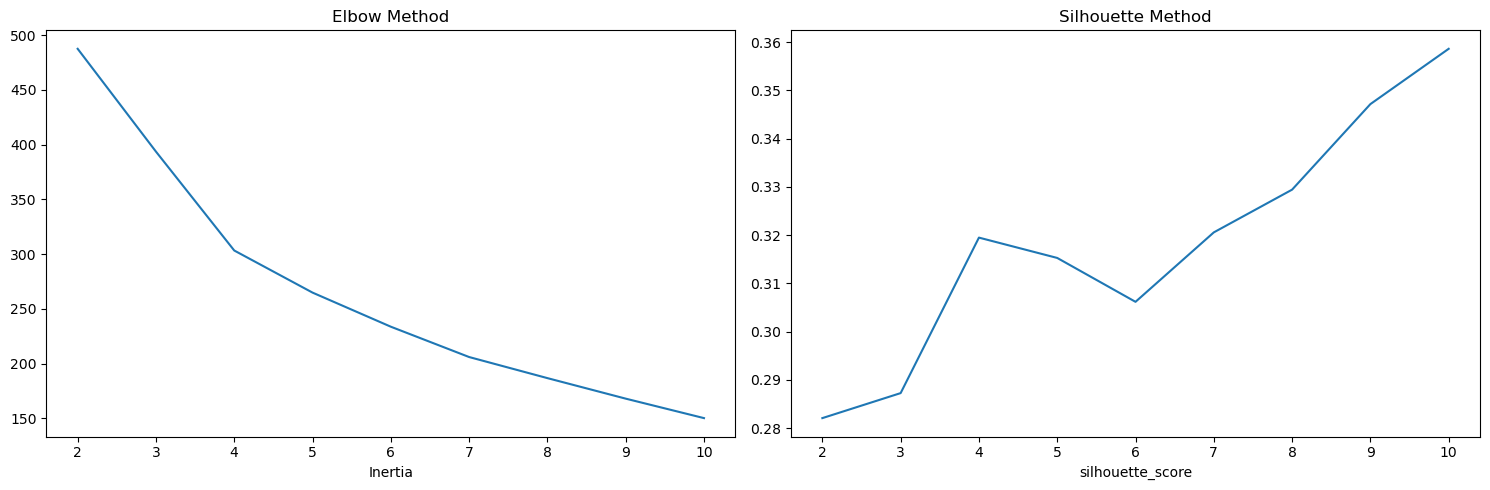

In [7]:
from funcoes_auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df_scaled)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("clustering", KMeans(n_clusters=5, random_state=42, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [9]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Age', 'Annual Income (k$)',
                                   'Spending Score (1-100)']),
                                 ('onehot', OneHotEncoder(), ['Gender'])]),
 'clustering': KMeans(n_clusters=5, n_init=10, random_state=42)}

In [10]:
pipeline["clustering"].labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 4,
       1, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [11]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


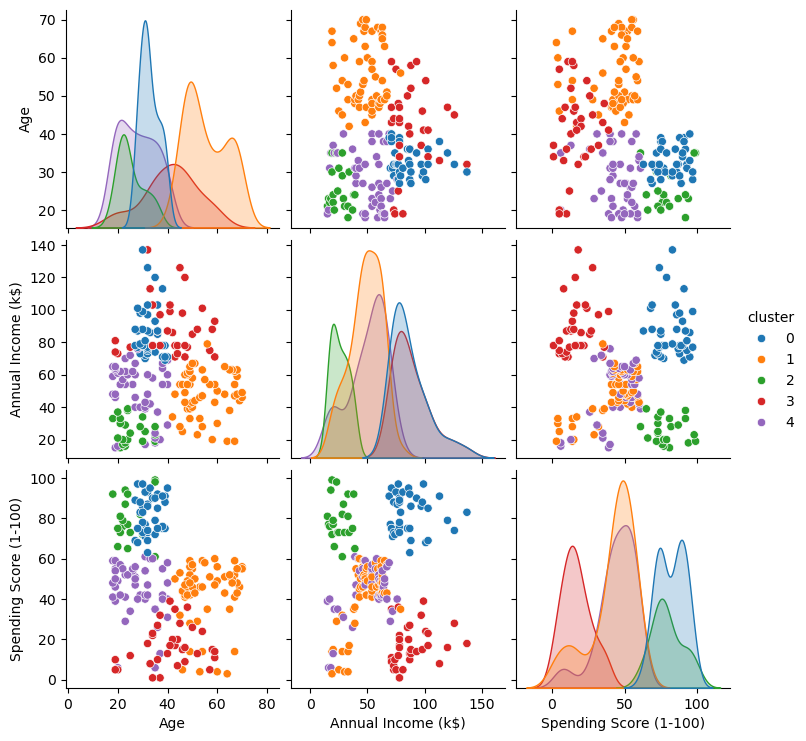

In [12]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");

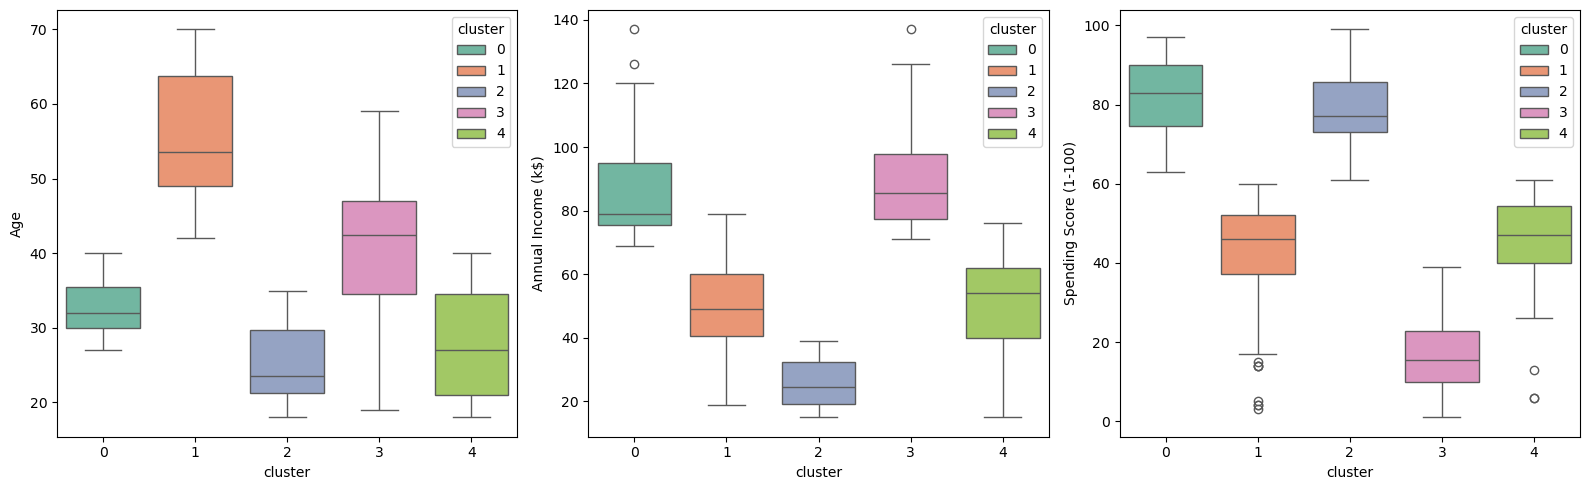

In [13]:
import matplotlib.pyplot as plt
palette = sns.color_palette("Set2", n_colors=5)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), tight_layout=True)

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, hue="cluster", ax=ax, palette=palette)
    

plt.show()

## Descrição dos Clusters

Cluster 0 - Pontuação de gastos alta, renda alta, idade jovem  
Cluster 1 - Pontuação de gastos moderada, renda moderada, idade alta  
Cluster 2 - Pontuação de gastos alta, renda baixa, idade jovem  
Cluster 3 - Pontuação de gastos baixa, renda alta, idade moderada  
Cluster 4 - Pontuação de gastos moderada, renda moderada, idade jovem  

### Tabela Resumida

| Pontuação de Gastos | Renda   | Idade    | Cluster |
|---------------------|---------|----------|---------|
| Alta                | Alta    | Jovem    | 0       |
| Moderada            | Moderada| Alta     | 1       |
| Alta                | Baixa   | Jovem    | 2       |
| Baixa               | Alta    | Moderada | 3       |
| Moderada            | Moderada| Jovem    | 4       |



In [14]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    39
1    58
2    22
3    34
4    47
Name: count, dtype: int64

In [15]:
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    21
         Male      18
1        Female    33
         Male      25
2        Female    13
         Male       9
3        Female    14
         Male      20
4        Female    31
         Male      16
dtype: int64

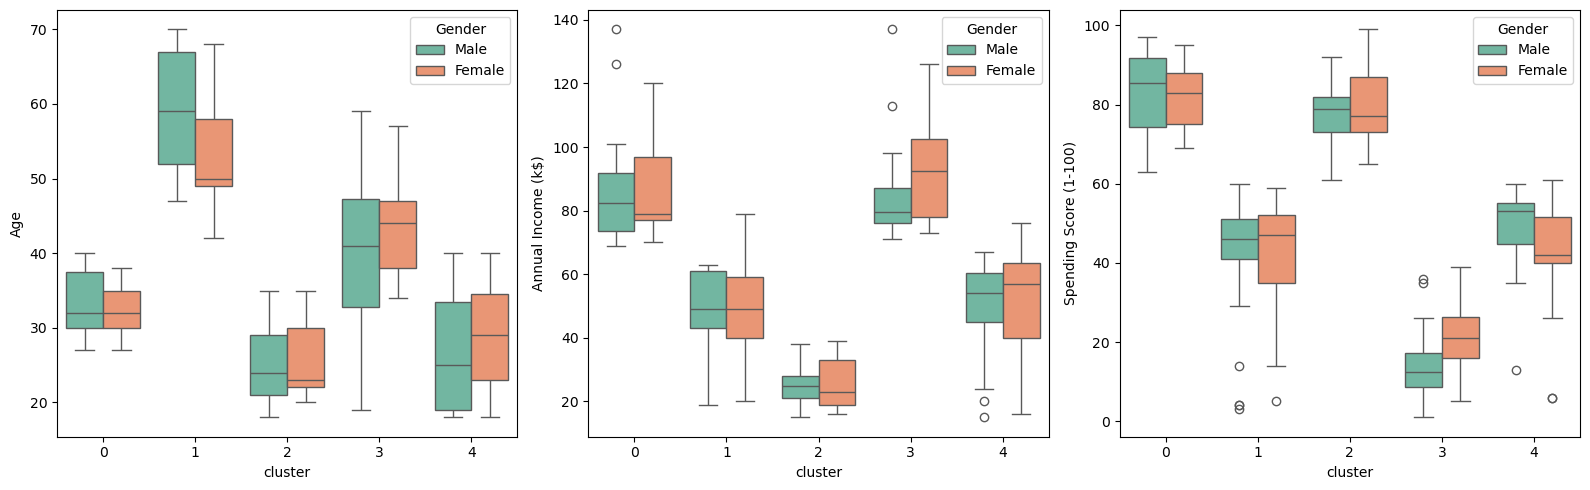

In [16]:
palette = sns.color_palette("Set2", n_colors=2)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), tight_layout=True)

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, hue="Gender", ax=ax, palette=palette)
      

plt.show()

In [18]:
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [19]:
pipeline["clustering"].cluster_centers_

array([[-0.44191719,  0.99158305,  1.23950275,  0.53846154,  0.46153846],
       [ 1.19862745, -0.46098141, -0.32703818,  0.56896552,  0.43103448],
       [-0.97439592, -1.32954532,  1.13217788,  0.59090909,  0.40909091],
       [ 0.17329545,  1.06645385, -1.2980103 ,  0.41176471,  0.58823529],
       [-0.78172248, -0.40306917, -0.21591396,  0.65957447,  0.34042553]])

In [20]:
centroids=pipeline["clustering"].cluster_centers_[:, :-2]
centroids

array([[-0.44191719,  0.99158305,  1.23950275],
       [ 1.19862745, -0.46098141, -0.32703818],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [-0.78172248, -0.40306917, -0.21591396]])

## Visualização com ipympl e Gráficos 3D em Clusterização de Clientes

### O Papel do ipympl
O **ipympl** é uma biblioteca que integra a visualização do Matplotlib com Jupyter Notebooks, permitindo uma experiência interativa. Com ele, é possível criar gráficos que respondem a eventos de mouse, zoom e pan, proporcionando uma análise mais dinâmica dos dados. 
[Documentação do ipympl](https://github.com/matplotlib/ipympl)

### Importância da Visualização de Gráficos 3D
A visualização de dados em **3D** é crucial para projetos de clusterização de clientes, especialmente quando existem dimensões que não podem ser claramente representadas em 2D. Abaixo, destacamos a importância dessa visualização:

- **Sobreposição em Gráficos 2D**: Em gráficos bidimensionais, clusters podem se sobrepor, dificultando a identificação de fronteiras claras entre os grupos. Isso pode levar a interpretações erradas e a um agrupamento menos preciso.
- **Diferença para um Gráfico 3D**: A adição de uma terceira dimensão permite visualizar a distribuição dos clusters de forma mais clara, destacando as diferenças que não são aparentes em 2D. Isso é especialmente útil para identificar subgrupos e padrões ocultos que podem passar despercebidos.

### Benefícios da Visualização 3D
1. **Maior Clareza**: Proporciona uma visão mais completa da distribuição dos dados, permitindo uma separação mais clara entre clusters.
2. **Identificação de Padrões**: Facilita a identificação de padrões complexos que podem não ser visíveis em duas dimensões.
3. **Interatividade**: Com o uso de bibliotecas como o ipympl, a interação com gráficos 3D se torna mais intuitiva, permitindo uma exploração mais detalhada dos dados.

Utilizar gráficos 3D em projetos de clusterização de clientes é uma prática recomendada para garantir uma análise mais precisa e uma melhor compreensão dos dados.

![Exemplo de Gráfico 3D com ipympl](https://matplotlib.org/stable/_images/sphx_glr_scatter3d_001.png)


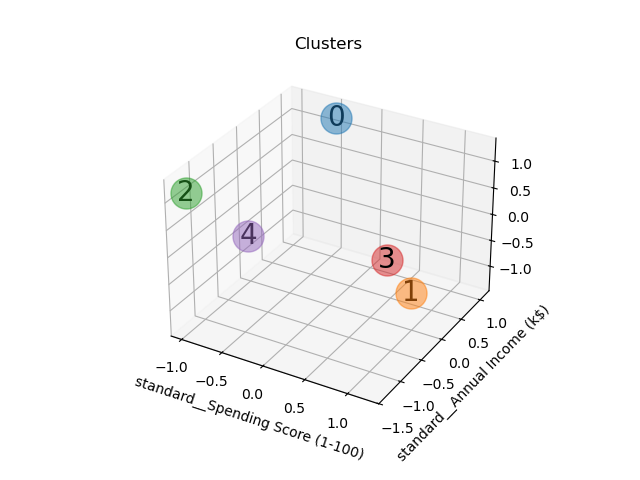

In [21]:
%matplotlib ipympl
from funcoes_auxiliares import visualizar_cluster

visualizar_cluster(
    dataframe=df_scaled,
    colunas=['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'],
    quantidade_cores=5,
    centroids=centroids
)

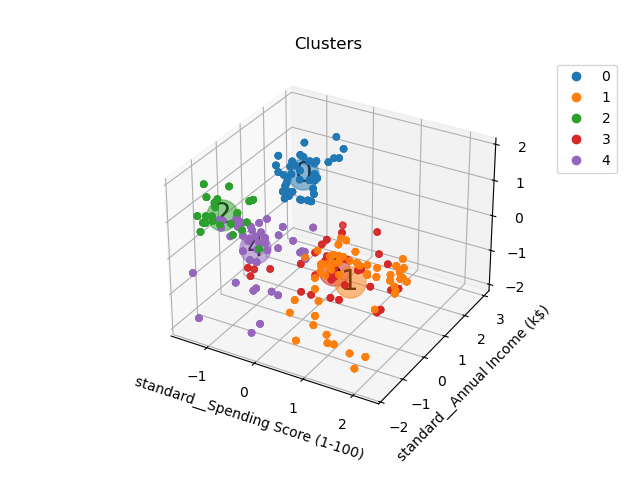

In [22]:
visualizar_cluster(
    dataframe=df_scaled,
    colunas=['standard__Age', 'standard__Annual Income (k$)', 'standard__Spending Score (1-100)'],
    quantidade_cores=5,
    centroids=centroids,
    mostrar_pontos=True,
    coluna_clusters=df_clustered["cluster"]
);